# FINAL PROJECTS 3

## 1. Introduction

**Kelompok 2:**
<ol>
    <li>Mohammad Arkan - PYTN-KS16-09</li>
    <li>Jonathan Calvin Limawal - PYTN-KS16-019</li>
    <li>Desi Suci Nopianti - PYTN-KS16-025</li>
</ol>

## Project Overview

Dataset yang digunakan pada projek ini adalah dataset publik yang tersedia di-*website* Kaggle (https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/)

Dataset ini berisi informasi mengenai *data record* pasien yang memiliki masalah dengan jantung mereka. Dataset ini dapat digunakan untuk memprediksi apakah pasien akan mengalami kegagalan jantung atau tidak. Tujuan utama dari proyek ini adalah membuat model untuk memprediksi kematian akibat gagal jantung menggunakan konsep Klasifikasi dengan *ensemble learning*. Algoritma yang dipilih pada pengerjaan proyek ini adalah algoritma Random Forest Classifier, AdaBoostClassifier, GradientBoostingClassifier,dan XGBClassifier, 

Random Forest merupakan algoritma yang menerapkan metode *ensemble* dari algoritma *decision tree*. Selain itu, sebelum ke tujuan utama, diperlukan beberapa proses seperti *data cleaning*, eksplorasi data, dan *data preprocessing* untuk memproses dataset agar siap dan dapat menghasilkan model klasifikasi yang optimal. Dataset ini memiliki dimensi sebesar 299 *rows* × 13 *columns* dengan semua fitur/kolom bertipe data numerik/kontinu.

## Informasi Attribut/Kolom

<ol>
    <li>age - umur pasien</li>
    <li>anemia - apakah ada pengurangan hemoglobin</li>
    <li>creatinine_phosphokinase - level enzim CPK dalam mcg/L</li>
    <li>diabetes - apakah pasien punya riwayat diabetes di setiap kontraksi jantung</li>
    <li>ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi</li>
    <li>high_blood_pressure - apakah pasien punya darah tinggi</li>
    <li>platelets - jumlah platelet di darah dalam kiloplatelets/mL</li>
    <li>serum_creatinine - level serum creatinine di darah dalam mg/dL</li>
    <li>serum_sodium - level serum sodium di darah dalam mEq/L</li>
    <li>sex - apakah pasien pria atau wanita</li>
    <li>smoking - apakah pasien merokok</li>
    <li>time - waktu dalam hari untuk follow-up</li>
    <li>DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up</li>
</ol>

## Tahapan Project

<ol>
    <li>Introduction</li>
    <li>Import Libraries</li>
    <li>Data Loading</li>
    <li>Data Cleaning</li>
    <li>Data Splitting</li>
    <li>Data Exploration</li>
    <li>Data Preprocessing</li>
    <li>Feature Scaling</li>
    <li>Resampling Data</li>
    <li>Random Forest</li>
    <li>XGBoost</li>
    <li>AdaBoost</li>
    <li>Gradient Boosting</li>
    <li>Algorithm Analysis</li>
</ol>

## Project Objectivess

Final project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut :
    
- Mampu memahami konsep Classification dan Ensemble Model
- Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
- Mampu mengimplementasikan ensemble model untuk membuat prediksi

## 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler

from collections import Counter
from scipy.stats import skew, shapiro, f_oneway, chi2_contingency
from scipy import stats
from imblearn.over_sampling import SMOTE

## 3. Data Loading

In [2]:
# Mengantisipasi untuk unstandard missing values
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN', ' ', ' - ']

# Membaca dataset
heartFailure_df = pd.read_csv('heart_failure_clinical_records_dataset.csv', na_values=missing_values)

# Menampilkan tampilan kolom full
pd.set_option('display.max_columns', 500)

# Menampilkan Datasett
heartFailure_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Keterangan :
- anemia : 0 = No, 1 = Yes
- diabetes : 0 = No, 1 = Yes
- high_blood_pressure : 0 = No, 1 = Yes
- sex : Gender of patient Male = 1, Female = 0
- smoking : 0 = No, 1 = Yes
- DEATH_EVENT : 0 = No, 1 = Yes

Untuk keperluan analisis data yang lebih baik, maka untuk setiap fitur yang berisikan data 0,1 atau boolean replace terlebih dahulu menjadi Yes,No.

In [3]:
dic = {1:'Yes', 0:'No'}
heartFailure_df[['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']] = heartFailure_df[['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']].replace(dic)

heartFailure_df.loc[:, 'sex'] = heartFailure_df['sex'].map({1: 'Male', 0: 'Female'})

heartFailure_df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Male,No,4,Yes
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Male,No,6,Yes
2,65.0,No,146,No,20,No,162000.00,1.3,129,Male,Yes,7,Yes
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Male,No,7,Yes
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Female,No,8,Yes


In [4]:
# Menghitung jumlah baris dan kolom
rows, columns = heartFailure_df.shape
print('Dataset ini terdapat: ')
# Menampilkan jumlah baris
print(rows, "Rows")
# Menampilkan jumlah kolom
print(columns, "Columns")

Dataset ini terdapat: 
299 Rows
13 Columns


In [5]:
# Melihat attribut yang ada pada dataset
heartFailure_df.columns.values

array(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'], dtype=object)

In [6]:
# Melihat statistik deskriptif dari data
heartFailure_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
time,299.0,130.260870,77.614208,4.0,73.0,115.0,203.0,285.0


In [7]:
# Melihat informasi tentang dataset
heartFailure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 30.5+ KB


In [8]:
# Cek data categorical
categorical_features = heartFailure_df.select_dtypes(include=['object','category']).columns.tolist()
print("Fitur categorical : {}".format(len(categorical_features)))
print("Fitur categorical :", categorical_features)

Fitur categorical : 6
Fitur categorical : ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']


In [9]:
# Cek data numerical
numerical_features = heartFailure_df.select_dtypes(include=['number']).columns.tolist()
print("Jumlah fitur numerical: {}".format(len(numerical_features)))
print("Fitur numerical :", numerical_features)

Jumlah fitur numerical: 7
Fitur numerical : ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


In [10]:
# Cek missing value
heartFailure_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
# Cek persentase missing value
data_types = pd.DataFrame(heartFailure_df.dtypes, columns=['Data types'])
Null_count = pd.DataFrame(heartFailure_df.isnull().sum(), columns=['Null count'])
Null_Percentage = pd.DataFrame(heartFailure_df.isnull().sum()/heartFailure_df.shape[0]*100, columns=['Null Percentage'])

view_null = pd.concat([data_types, Null_count, Null_Percentage], axis='columns')
view_null

,Data types,Null count,Null Percentage
age,float64,0,0.0
anaemia,object,0,0.0
creatinine_phosphokinase,int64,0,0.0
diabetes,object,0,0.0
ejection_fraction,int64,0,0.0
high_blood_pressure,object,0,0.0
platelets,float64,0,0.0
serum_creatinine,float64,0,0.0
serum_sodium,int64,0,0.0
sex,object,0,0.0


In [12]:
# Cek duplikat ata
heartFailure_df.duplicated().sum()

0

Dataset ini tidak terdapat missing value dan data duplikat.

## 4. Data Cleaning

Dari hasil sebelumnya, terlihat bahwa dataset ini sudah cukup bersih (tidak ada *missing values* dan *duplicate values* maka pada tahap ini tidak terlalu banyak hal yang dilakukan.

In [13]:
# Cek 5 data teratas
heartFailure_df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Male,No,4,Yes
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Male,No,6,Yes
2,65.0,No,146,No,20,No,162000.00,1.3,129,Male,Yes,7,Yes
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Male,No,7,Yes
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Female,No,8,Yes
5,90.0,Yes,47,No,40,Yes,204000.00,2.1,132,Male,Yes,8,Yes
6,75.0,Yes,246,No,15,No,127000.00,1.2,137,Male,No,10,Yes
7,60.0,Yes,315,Yes,60,No,454000.00,1.1,131,Male,Yes,10,Yes
8,65.0,No,157,No,65,No,263358.03,1.5,138,Female,No,10,Yes
9,80.0,Yes,123,No,35,Yes,388000.00,9.4,133,Male,Yes,10,Yes


In [14]:
# Ubah nama kolom menjadi kecil semua
heartFailure_df.columns = heartFailure_df.columns.str.lower()

In [15]:
# Cek data
heartFailure_df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Male,No,4,Yes
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Male,No,6,Yes
2,65.0,No,146,No,20,No,162000.00,1.3,129,Male,Yes,7,Yes
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Male,No,7,Yes
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Female,No,8,Yes
5,90.0,Yes,47,No,40,Yes,204000.00,2.1,132,Male,Yes,8,Yes
6,75.0,Yes,246,No,15,No,127000.00,1.2,137,Male,No,10,Yes
7,60.0,Yes,315,Yes,60,No,454000.00,1.1,131,Male,Yes,10,Yes
8,65.0,No,157,No,65,No,263358.03,1.5,138,Female,No,10,Yes
9,80.0,Yes,123,No,35,Yes,388000.00,9.4,133,Male,Yes,10,Yes


In [16]:
# Cek missing value
heartFailure_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

## 5. Data Splitting

In [17]:
heartFailure_df['death_event'].value_counts()

No     203
Yes     96
Name: death_event, dtype: int64

In [18]:
train, test = train_test_split(heartFailure_df, test_size=0.15, random_state=42, stratify=heartFailure_df['death_event'])
print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (254, 13)
Test set size: (45, 13)


In [19]:
train['death_event'].value_counts()

No     172
Yes     82
Name: death_event, dtype: int64

In [20]:
test['death_event'].value_counts()

No     31
Yes    14
Name: death_event, dtype: int64

## 6. Data Exploration

### 6.1 Checking Numerical Columns Distribution

In [21]:
train['creatinine_phosphokinase'].unique()

array([ 582, 2522,  212,  146,   93,   53,  115,   63, 1688,  190,  231,
         59,  308,  110,  707,   57,  298,  482, 2794,   47,   60,   64,
        119,  981,  292,  358,  167,  910,  130,   61,  257,  157,  144,
         66,   56,  121,  646,  104,  101,   68,   72,  170,  260, 7702,
        113,  936,  943,  159,  233,   92,  128,  132,  161,  168,  400,
        249,   70,  143,   91,  151,  618,   97, 1021, 2656,   80,  193,
       1846,  395,  748, 2334,  897,  305,  789,  250,   23, 2281,  122,
        258,  805,   30,  149,  371,  111,   81,  898,  148, 1548,  180,
         96,  203,  326, 2060,   95,  245,  220,  607,   76, 1876, 2695,
        379,  200,  418,  253,  655,  318, 1767,  615,  427,  776,  160,
        156,  281, 1820,  135,  337,  577,  248, 1185,  364,  109,  553,
       1211,  224,  125, 5882,  235,  191,   84,  207,  675,   88,  328,
        720,  478,  892,  198,  129, 2413,  719, 2442,  336,  737, 1896,
        145,  835, 3966,  232, 1199,  291, 1051, 39

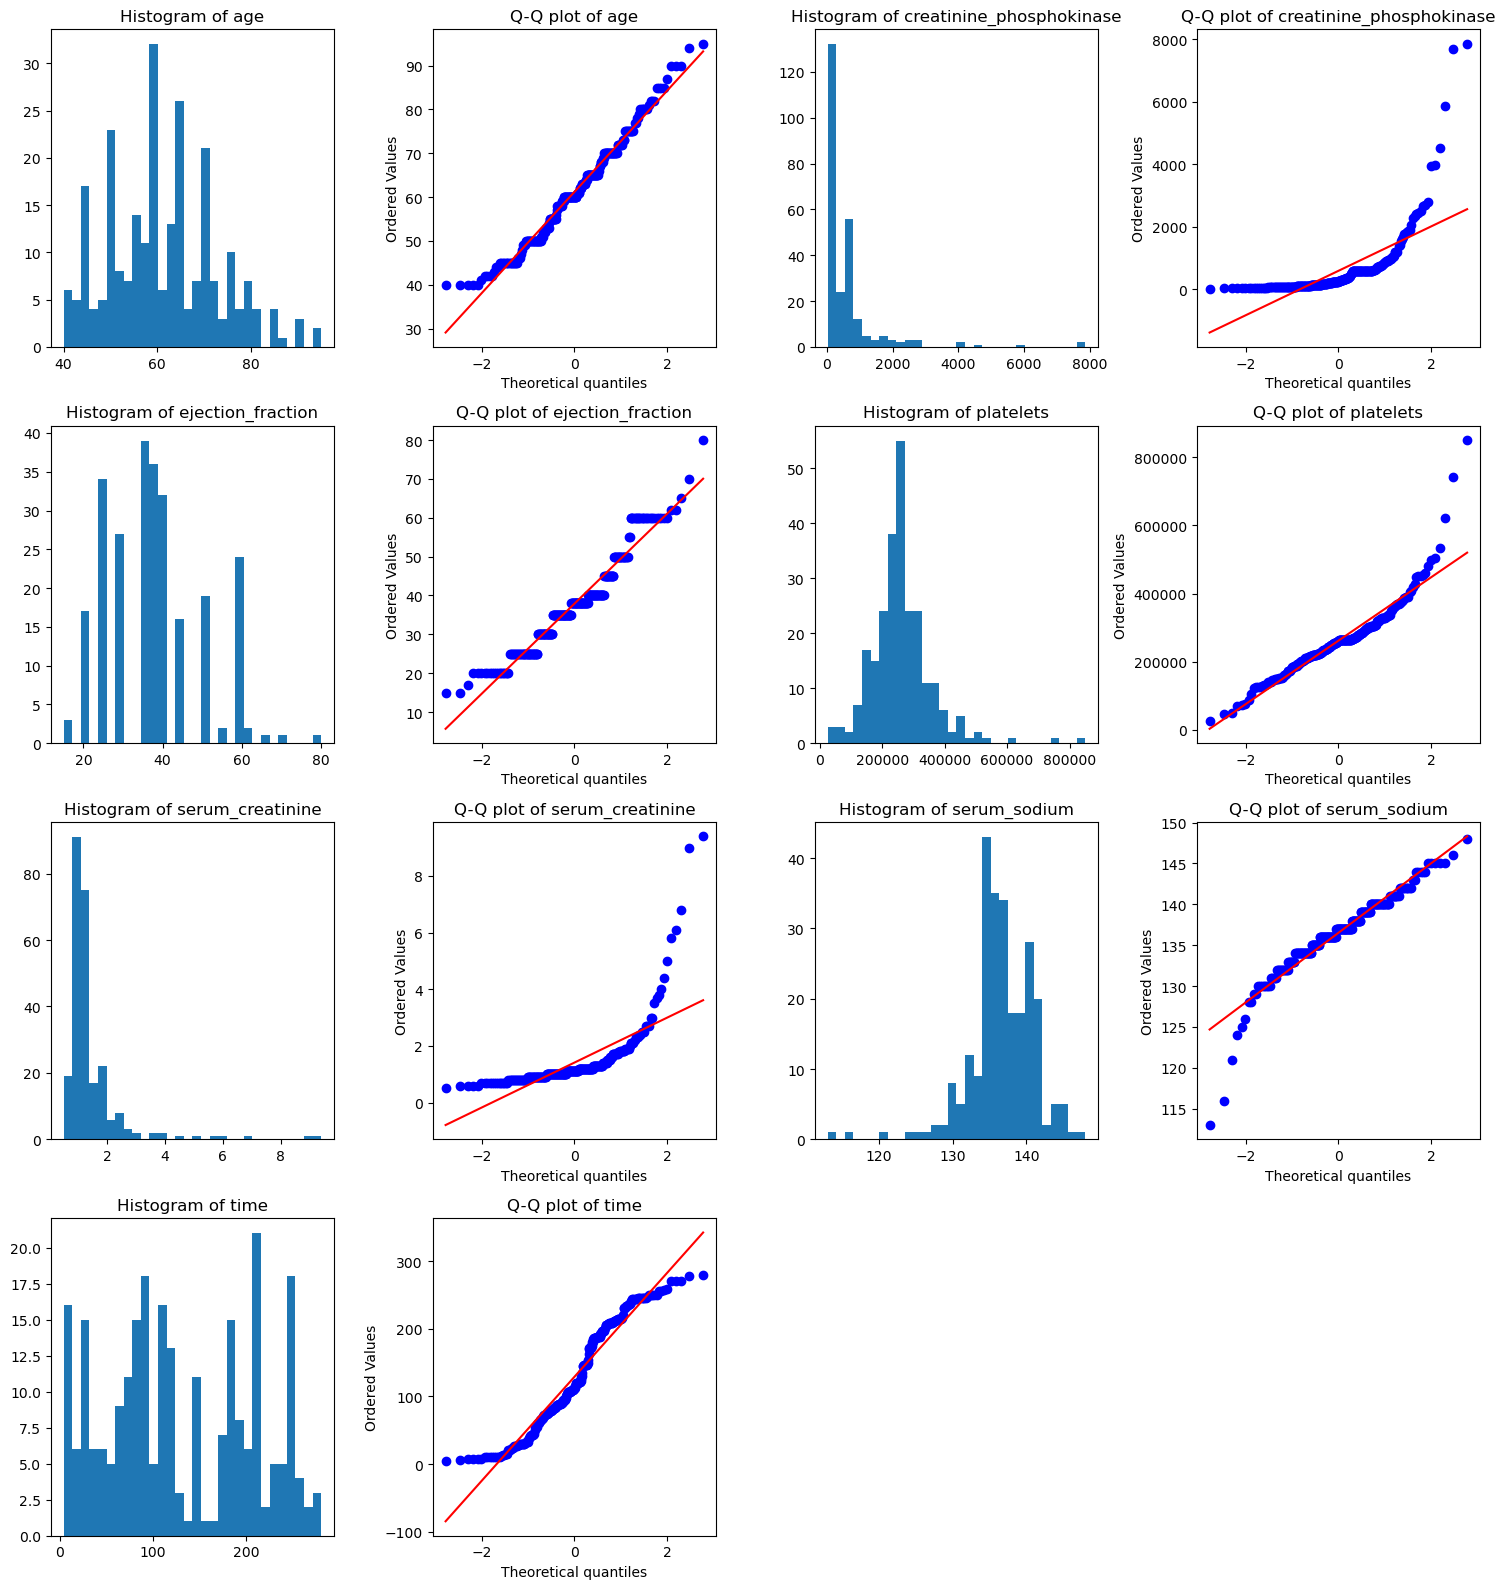

In [22]:
num_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 
               'serum_creatinine', 'serum_sodium', 'time']

columns_per_row = 4
num_rows = len(num_columns) // columns_per_row
if len(num_columns) % columns_per_row != 0:
    num_rows += 1

fig, axes = plt.subplots(nrows=num_rows * 2, ncols=columns_per_row, figsize=(15, num_rows * 8))
axes = axes.flatten()

for i in range(len(axes) // 2):
    if i < len(num_columns):
        col = num_columns[i]
        ax = axes[i * 2]
        ax.hist(train[col], bins=30)
        ax.set_title(f'Histogram of {col}')

        ax = axes[i * 2 + 1]
        stats.probplot(train[col], dist="norm", plot=ax)
        ax.set_title(f'Q-Q plot of {col}')
    else:
        fig.delaxes(axes[i * 2])
        fig.delaxes(axes[i * 2 + 1])

plt.tight_layout()
plt.show()

In [23]:
for col in num_columns:
    has_zero = (train[col] == 0).any()
    print(f'{col} memiliki nilai 0: {has_zero}')

age memiliki nilai 0: False
creatinine_phosphokinase memiliki nilai 0: False
ejection_fraction memiliki nilai 0: False
platelets memiliki nilai 0: False
serum_creatinine memiliki nilai 0: False
serum_sodium memiliki nilai 0: False
time memiliki nilai 0: False


Untuk membuat data numerikal yang tidak berdistribusi normal, kita akan menggunakan teknik/metode ***Log Transformation***.

Alasannya karena data numerikal kita tidak memiliki nilai 0 dan nilai negatif (-).

In [24]:
from scipy.stats import yeojohnson

for col in num_columns:
    stat, p = shapiro(train[col])
    if p < 0.05:
        train[col] = np.log1p(train[col])
        test[col] = np.log1p(test[col])

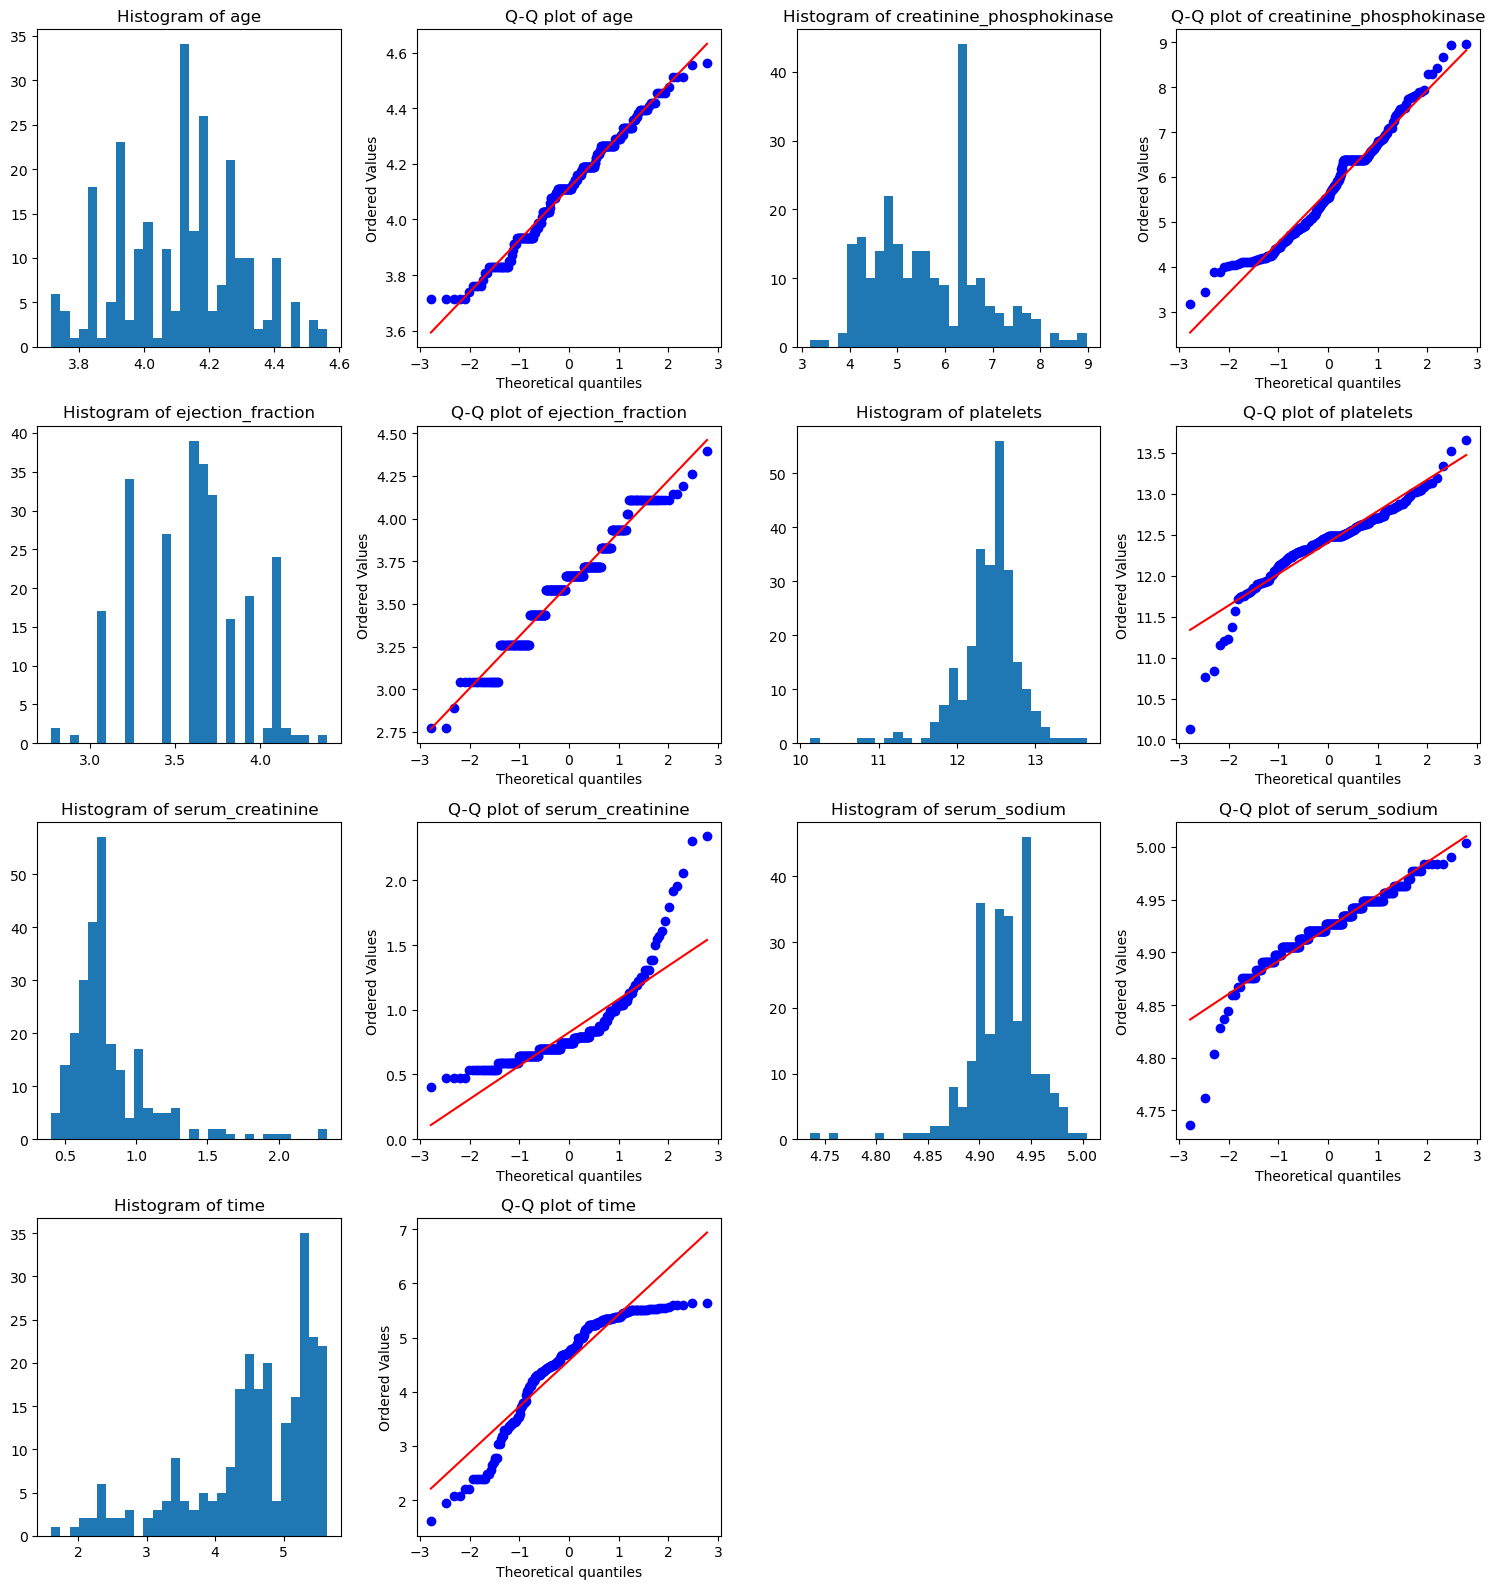

In [25]:
fig, axes = plt.subplots(nrows=num_rows * 2, ncols=columns_per_row, figsize=(15, num_rows * 8))
axes = axes.flatten()

for i in range(len(axes) // 2):
    if i < len(num_columns):
        col = num_columns[i]
        ax = axes[i * 2]
        ax.hist(train[col], bins=30)
        ax.set_title(f'Histogram of {col}')

        ax = axes[i * 2 + 1]
        stats.probplot(train[col], dist="norm", plot=ax)
        ax.set_title(f'Q-Q plot of {col}')
    else:
        fig.delaxes(axes[i * 2])
        fig.delaxes(axes[i * 2 + 1])

plt.tight_layout()
plt.show()

### 6.2 Checking & Removing Outliers

In [26]:
print("Training set size before removing outliers:", train.shape)
print("Test set size before removing outliers:", test.shape)

Training set size before removing outliers: (254, 13)
Test set size before removing outliers: (45, 13)


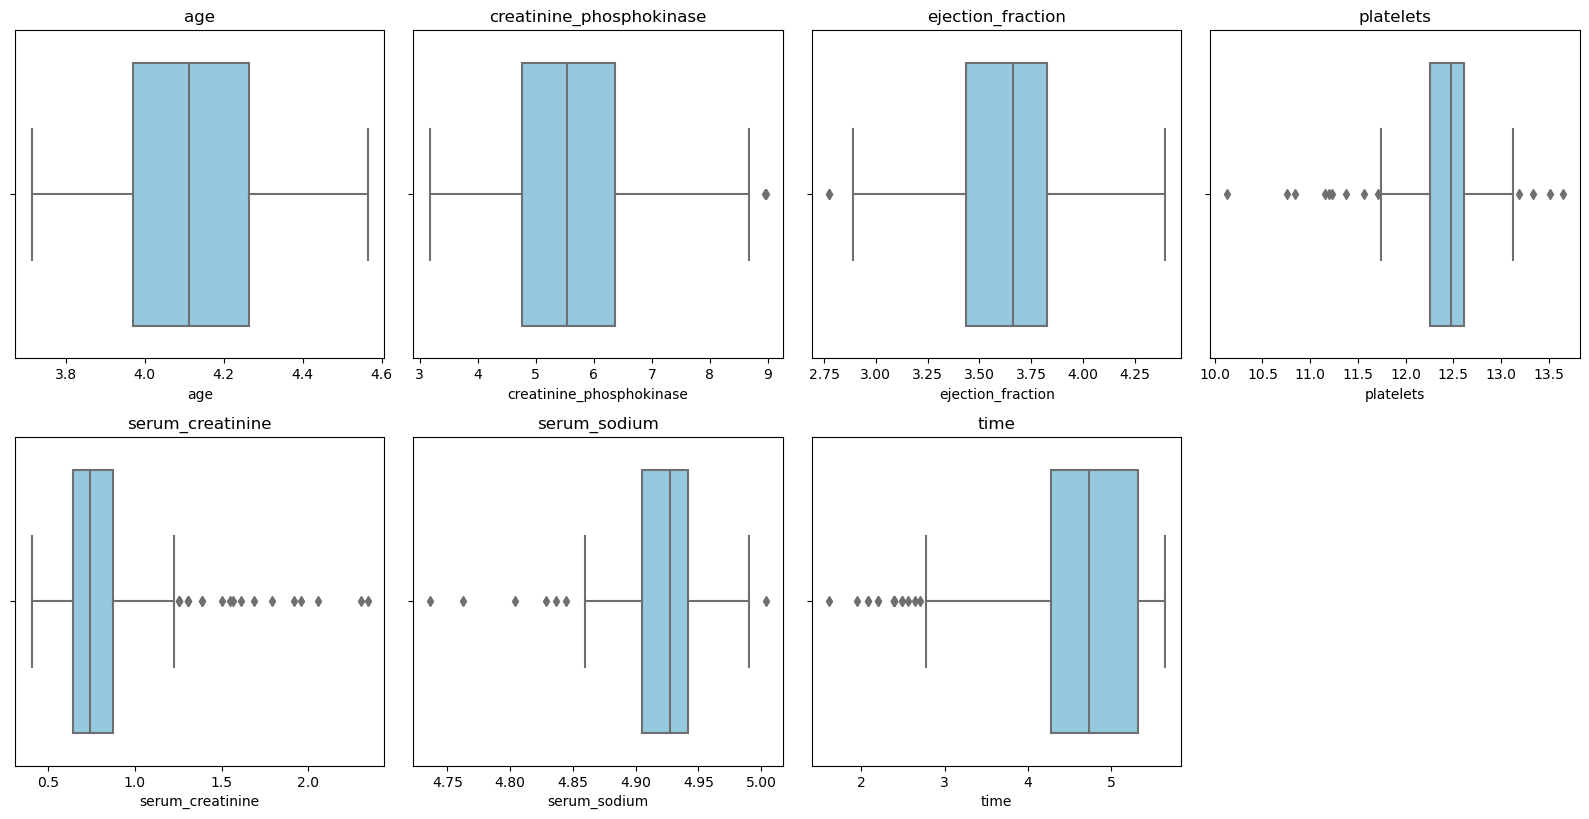

In [27]:
numerical_features = [col for col in num_columns if col in train.columns]

num_features_count = len(numerical_features)
num_rows = (num_features_count // 4) + (num_features_count % 4)
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, num_rows * 4))

axes = axes.flatten()

for i, column in enumerate(numerical_features):
    ax = axes[i]
    sns.boxplot(x=train[column].dropna(), ax=ax, color='skyblue')
    ax.set_title(column)

for i in range(num_features_count, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [28]:
for col in num_columns:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Only keep rows in the dataframe that have values within the IQR
    train = train[(train[col] >= Q1 - 1.5*IQR) & (train[col] <= Q3 + 1.5*IQR)]

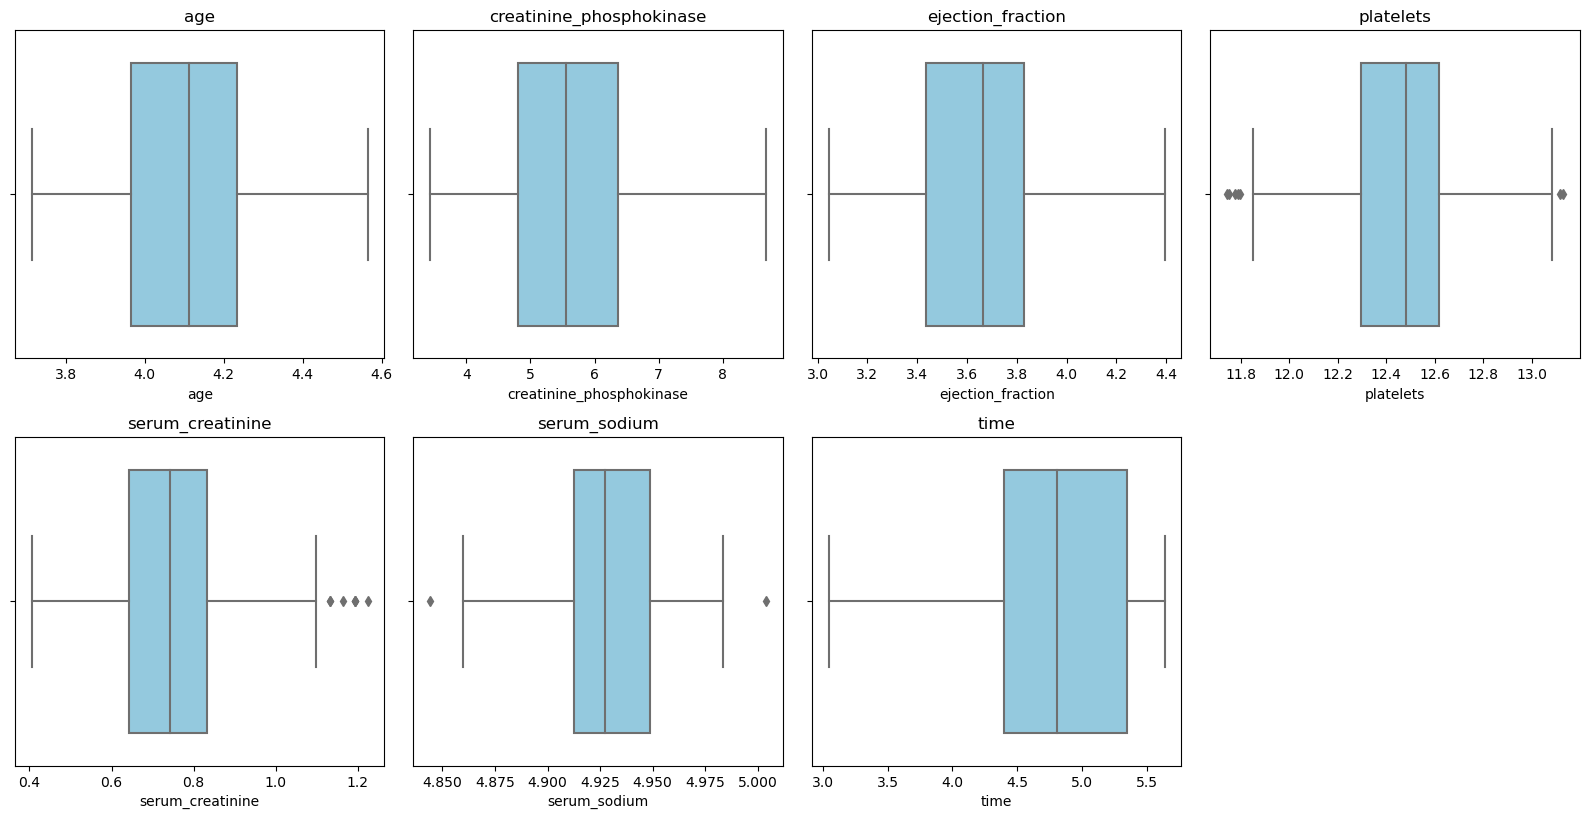

In [29]:
numerical_features = [col for col in num_columns if col in train.columns]

num_features_count = len(numerical_features)
num_rows = (num_features_count // 4) + (num_features_count % 4)
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, num_rows * 4))

axes = axes.flatten()

for i, column in enumerate(numerical_features):
    ax = axes[i]
    sns.boxplot(x=train[column].dropna(), ax=ax, color='skyblue')
    ax.set_title(column)

for i in range(num_features_count, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [30]:
print("Training set size after removing outliers:", train.shape)
print("Test set size after removing outliers:", test.shape)

Training set size after removing outliers: (204, 13)
Test set size after removing outliers: (45, 13)


### 1.  Bagaimana distribusi kolom y (target)?

Percentage Death Event Distribution
No     67.89
Yes    32.11
Name: death_event, dtype: float64


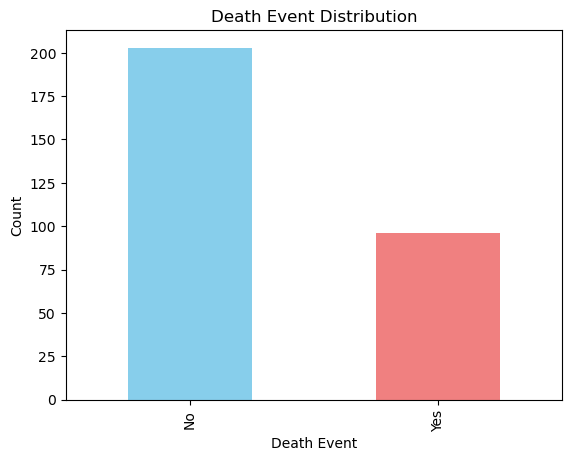

In [31]:
death_counts = heartFailure_df['death_event'].value_counts()

death_event_percent = heartFailure_df['death_event'].value_counts(normalize=True) * 100
print('Percentage Death Event Distribution')
print(death_event_percent.round(2))

death_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])

plt.xlabel('Death Event')
plt.ylabel('Count')
plt.title('Death Event Distribution')

plt.show()

**Insight:**  Kolom Death_Event (y atau target) tergolong *imbalanced* dengan nilai 'No' sekitar 67,89% dari total data dan nilai 'Yes' hanya sekitar 32,11% dari total data.

#### 2. Cek usia pasien berdasarkan death_status

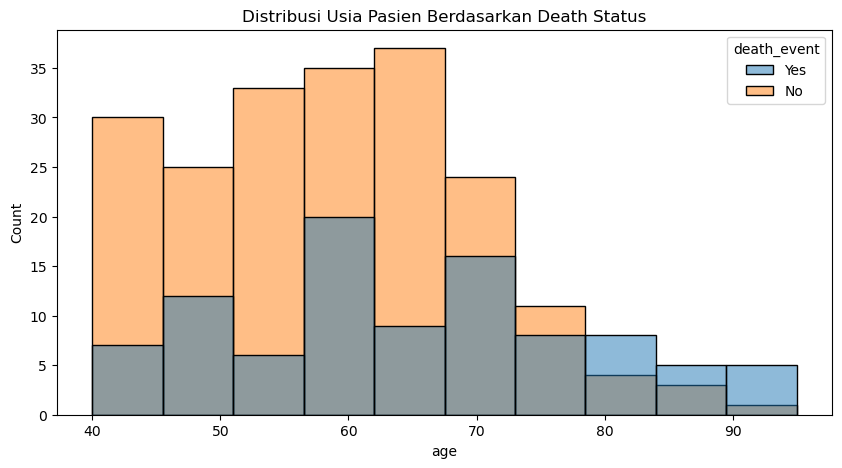

In [32]:
# Visualisasi usia pasien berdasarkan death status
plt.figure(figsize=(10,5))
sns.histplot(data=heartFailure_df, x='age', hue='death_event')
plt.title('Distribusi Usia Pasien Berdasarkan Death Status')
plt.show()

<b>Insight:</b> Pada ussia 60 tahun, tingkat kematian sangat tinggi.

#### 3. Berapa jumlah tiap penyakit berdasarkan parameter death status?

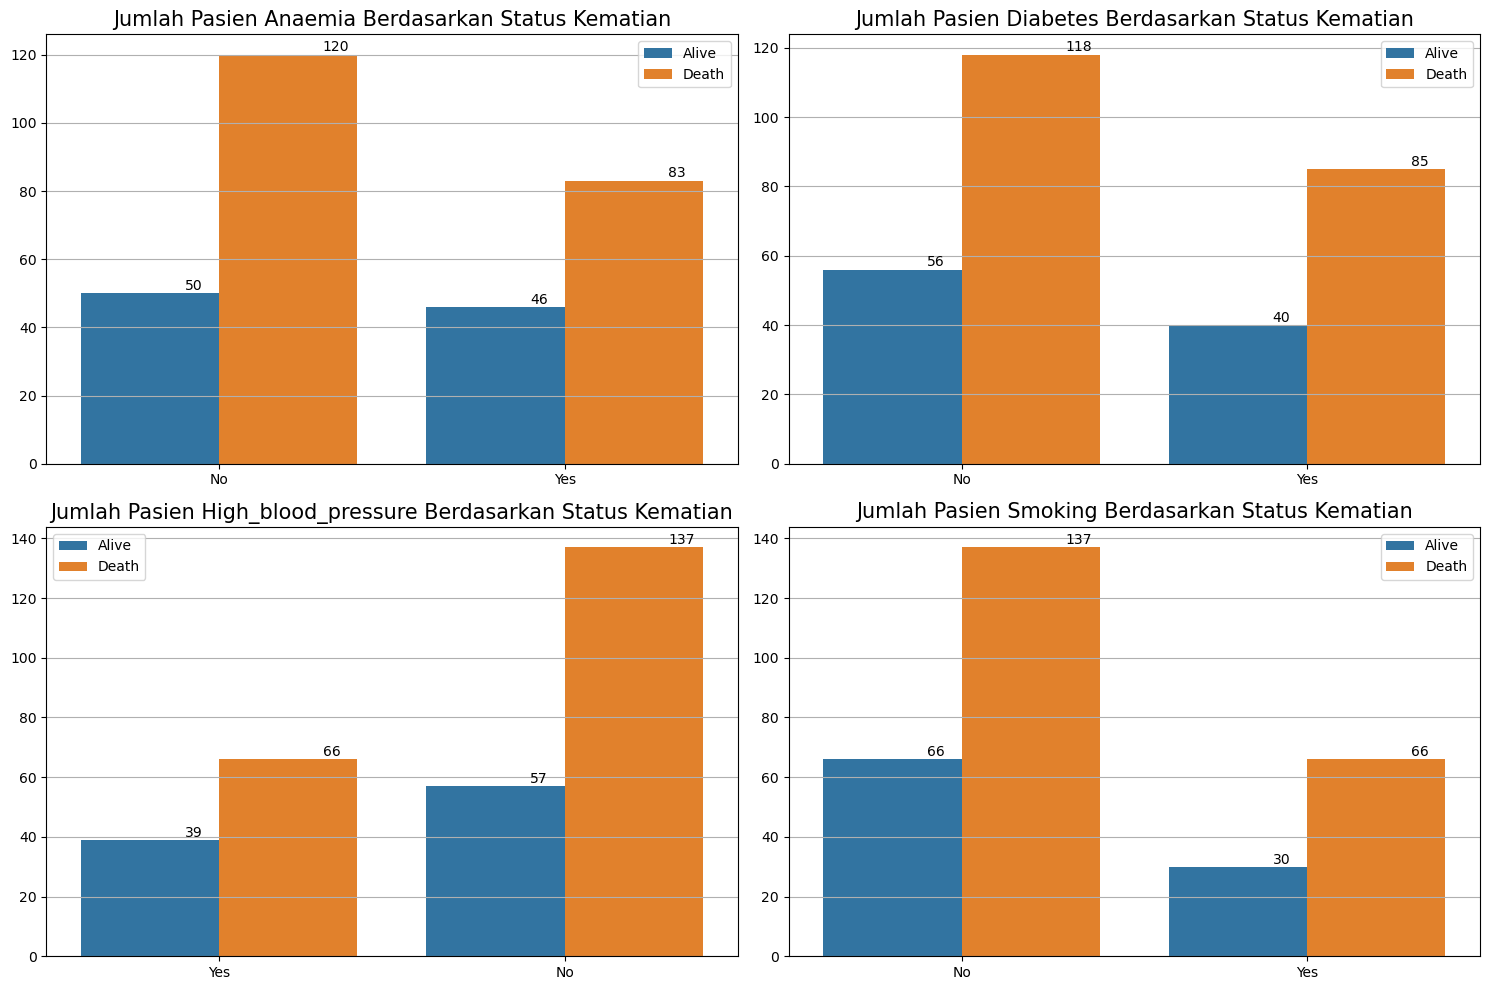

In [33]:
# Buat visualisasi menjadi 2 baris
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

penyakit = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

# Visualisasi penyakit berdasarkan death status
for i, ax in enumerate(ax.flatten()):
    sns.countplot(data=heartFailure_df, x=penyakit[i], hue='death_event', ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')

    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+1))
    
    ax.set_title(f'Jumlah Pasien {penyakit[i].capitalize()} Berdasarkan Status Kematian', fontsize=15)
    ax.legend(['Alive', 'Death'])
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

<b>Insight:</b>

- Dari 129 pasien yang terkena anemia, 35.65% pasien meninggal
- Dari 125 pasien yang terkena diabetes, 32% pasien meninggal
- Dari 105 pasien yang terkena darah tinggi, 37,14% pasien meninggal
- Dari 96 pasien yang aktif merokok, 31,25% pasien meninggal

Dikarenakan dataset yang masih kecil, data tersebut belum cukup untuk memastikan bahwa seseorang bisa meninggal akibat gejala yang ada

#### 4. Berapa persentase pasien yang meninggal?

In [34]:
male_survived = len(heartFailure_df[(heartFailure_df["death_event"]=='No') & (heartFailure_df["sex"]=='Male')])
male_died = len(heartFailure_df[(heartFailure_df["death_event"]=='Yes') & (heartFailure_df["sex"]=='Male')])
female_survived = len(heartFailure_df[(heartFailure_df["death_event"]=='No') & (heartFailure_df["sex"]=='Female')])
female_died = len(heartFailure_df[(heartFailure_df["death_event"]=='Yes') & (heartFailure_df["sex"]=='Female')])

print(male_survived)
print(male_died)
print(female_survived)
print(female_died)

132
62
71
34


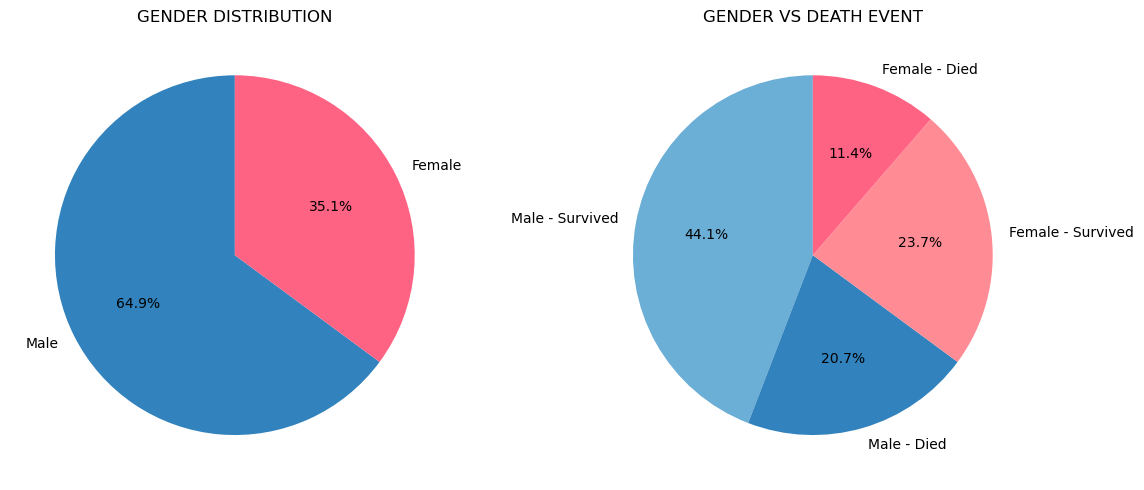

In [35]:
colors_1 = ["#3182BD", "#FF6384"]
colors_2 = ["#6BAED6", "#3182BD", "#FF8C94", "#FF6384"]

# Buat figure dengan subplo
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Gender distribution
gender_labels = ["Male", "Female"]
gender_values = [male_survived + male_died, female_survived + female_died]
axes[0].pie(gender_values, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=colors_1)
axes[0].set_title("GENDER DISTRIBUTION")

# Plot Gender vs Death Event
gender_death_labels = ['Male - Survived', 'Male - Died', 'Female - Survived', 'Female - Died']
gender_death_values = [male_survived, male_died, female_survived, female_died]
axes[1].pie(gender_death_values, labels=gender_death_labels, autopct='%1.1f%%', startangle=90, colors=colors_2)
axes[1].set_title("GENDER VS DEATH EVENT")

plt.tight_layout()

plt.show()

<b>Insight:</b> Dari subplot di atas kita dapat menyimpulkan bahwa dalam kumpulan data kita 64,9% adalah PRIA (di mana 44,1% selamat dan 20,7% mati) dan 35,1% adalah WANITA (23,7% selamat dan 11,4% mati).

#### 5. Korelasi tekanan darah tinggi terhadap kejadian kematian berdasarkan gender

In [36]:
heartFailure_df.groupby(['sex','high_blood_pressure','death_event']).size().unstack().apply(lambda x: x/x.sum(), axis=1)

death_event                       No       Yes
sex    high_blood_pressure                    
Female No                   0.721311  0.278689
       Yes                  0.613636  0.386364
Male   No                   0.699248  0.300752
       Yes                  0.639344  0.360656

<b>Insight:</b> terdapat beberapa perbedaan proporsi tetapi perbedaan tersebut lebih kepada kondisi tekanan darah tinggi daripada gender. untuk gender sendiri tidak terlalu memiliki pengaruh yang signifikan terhadap status kematian. Tingkat kematian untuk pasien dengan gender perempuan yang tidak memiliki tekanan darah tinggi sekitar 28% dan yang memiliki tekanan darah tinggi sekitar 39% sedangkan pada pasien laki-laki tingkat status kematian untuk pasien yang tidak mempunyai tekanan darah tinggi sekitar 30% dan yang mempunyai tekanan darah tinggi sekitar 36%. hal ini menunjukkan bahwa tekanan darah tinggi juga tidak memiliki pengaruh yang signifikan terhadap status kematian.

## 7. Preprocesing Data

### 7.1 Feature Selection/Reduction (for numerical columns)

In [37]:
heartFailure_df['time'].unique()

array([  4,   6,   7,   8,  10,  11,  12,  13,  14,  15,  16,  20,  22,
        23,  24,  26,  27,  28,  29,  30,  31,  32,  33,  35,  38,  40,
        41,  42,  43,  44,  45,  50,  54,  55,  59,  60,  61,  63,  64,
        65,  66,  67,  68,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  82,  83,  85,  86,  87,  88,  90,  91,  94,  95,  96,  97,
       100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117,
       118, 119, 120, 121, 123, 126, 129, 130, 134, 135, 140, 145, 146,
       147, 148, 150, 154, 162, 170, 171, 172, 174, 175, 180, 185, 186,
       187, 188, 192, 193, 194, 195, 196, 197, 198, 200, 201, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 220, 230, 231,
       233, 235, 237, 240, 241, 244, 245, 246, 247, 250, 256, 257, 258,
       270, 271, 278, 280, 285], dtype=int64)

In [38]:
numerical_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 
                     'serum_sodium', 'time', 'death_event']

In [39]:
num_df = train[numerical_columns].copy()  
num_df.loc[:, 'death_event'] = train['death_event'].map({'Yes': 1, 'No': 0})

num_df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,death_event
270,3.806662,6.368187,3.433987,12.481274,0.955511,4.875197,5.501258,0
250,3.931826,7.833204,3.433987,12.909173,0.405465,4.941642,5.370638,0
207,4.454347,5.361292,3.663562,12.133507,0.641854,4.919981,5.236442,0
231,4.262680,4.543295,3.583519,12.128117,0.741937,4.905275,5.342334,0
104,4.110874,3.988984,3.931826,12.563751,1.193922,4.969813,4.477337,0


In [40]:
from scipy.stats import pointbiserialr

for col in numerical_columns:
    corr, _ = pointbiserialr(num_df[col], num_df['death_event'])
    print(f'Point-Biserial Correlation between {col} and death_event: {corr:.3f}')

Point-Biserial Correlation between age and death_event: 0.242
Point-Biserial Correlation between creatinine_phosphokinase and death_event: 0.066
Point-Biserial Correlation between ejection_fraction and death_event: -0.359
Point-Biserial Correlation between platelets and death_event: 0.037
Point-Biserial Correlation between serum_creatinine and death_event: 0.322
Point-Biserial Correlation between serum_sodium and death_event: -0.119
Point-Biserial Correlation between time and death_event: -0.513
Point-Biserial Correlation between death_event and death_event: 1.000


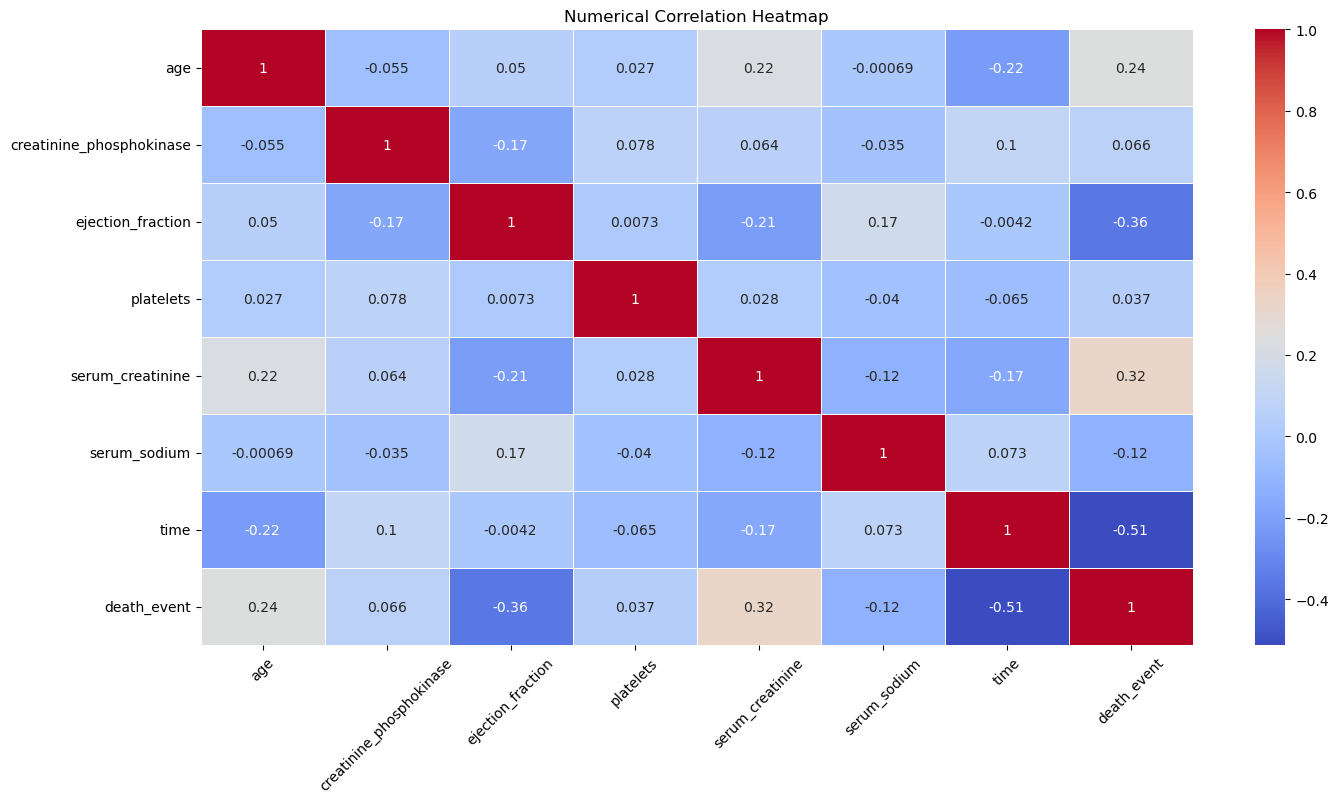

In [41]:
correlation_matrix = num_df.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Numerical Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

Dari hasil di atas, terlihat bahwa **kolom 'creatinine_phosphokinase' dan 'platelets' berkorelasi lemah dengan variabel target (y)**. Oleh karena itu, kita akan men-drop kedua kolom tersebut,

In [42]:
train.drop(columns=["creatinine_phosphokinase", "platelets"], inplace=True)
test.drop(columns=["creatinine_phosphokinase", "platelets"], inplace=True)

print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (204, 11)
Test set size: (45, 11)


In [43]:
print(num_df.columns)

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time', 'death_event'],
      dtype='object')


In [44]:
train.head()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,death_event
270,3.806662,No,Yes,3.433987,Yes,0.955511,4.875197,Male,Yes,5.501258,No
250,3.931826,No,No,3.433987,Yes,0.405465,4.941642,Female,No,5.370638,No
207,4.454347,No,No,3.663562,No,0.641854,4.919981,Male,No,5.236442,No
231,4.262680,No,No,3.583519,No,0.741937,4.905275,Male,Yes,5.342334,No
104,4.110874,No,No,3.931826,Yes,1.193922,4.969813,Female,No,4.477337,No


### 7.2 Feature Selection/Reduction (for categorical columns)

Untuk melihat korelasi kolom-kolom kategorikal dengan kolom 'death_event' yang juga merupakan kolom kategorikal, kami menggunakan **uji Chi-Square**.

H<sub>0</sub>  = Tidak ada korelasi yang signifikan antara kolom-kolom kategorikal dan 'death_event'.

H<sub>1</sub> = Ada korelasi yang signifikan antara kolom-kolom kategorikal dan 'death_event'.

&alpha; = 0.05

In [45]:
cat_column = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

y = 'death_event'

p_values = {}

for column in cat_column:
    contingency_table = pd.crosstab(train[column], train[y])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    p_values[column] = p

for column, p_value in p_values.items():
    print(f"The p-value for {column} is \t: {p_value}")

The p-value for anaemia is 	: 1.0
The p-value for diabetes is 	: 0.20122770678310087
The p-value for high_blood_pressure is 	: 0.2168201440147985
The p-value for sex is 	: 0.6186481315426308
The p-value for smoking is 	: 0.1612453887751233


### 7.3 Feature Engineering (for categorical columns)

Di sini, kita ingin mengevaluasi apakah penggabungan ketiga kolom kategorikal ('diabetes', 'high_blood_pressure', 'smoking') dapat membentuk sebuah kolom yang memiliki relevansi dan signifikansi terhadap variabel target (y).

In [46]:
cat_column = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']

cat_df = train[cat_column].copy()  
cat_df['dia_smo_hbp'] = cat_df['diabetes'].astype(str) + cat_df['smoking'].astype(str) + cat_df['high_blood_pressure'].astype(str)

cat_df = cat_df.drop(columns=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], axis=1)
cat_df['dia_smo_hbp'].value_counts()

NoNoNo       41
YesNoNo      41
NoYesNo      32
NoNoYes      28
YesNoYes     28
YesYesNo     14
NoYesYes     11
YesYesYes     9
Name: dia_smo_hbp, dtype: int64

In [47]:
contingency_table = pd.crosstab(cat_df['dia_smo_hbp'], cat_df['death_event'])
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"The p-value for dia_smo_hbp is: {p_val}")

The p-value for dia_smo_hbp is: 0.18504722952538916


Untuk hasil uji Chi-Square pada kolom-kolom di atas (bahkan setelah digabung), semua p-value dari kolom-kolom kategorikal > 0.05 (alfa).  Hal ini menandakan bahwa **tidak ada korelasi yang signifikan antara kolom-kolom kategorikal dan 'death_event'.**

Oleh karena itu, **kita akan mendrop semua kolom-kolom kategorikal**.

In [48]:
train = train.drop(columns=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], axis=1)
test = test.drop(columns=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], axis=1)

print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (204, 6)
Test set size: (45, 6)


### 7.4 Final Columns

In [49]:
train.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time,death_event
270,3.806662,3.433987,0.955511,4.875197,5.501258,No
250,3.931826,3.433987,0.405465,4.941642,5.370638,No
207,4.454347,3.663562,0.641854,4.919981,5.236442,No
231,4.262680,3.583519,0.741937,4.905275,5.342334,No
104,4.110874,3.931826,1.193922,4.969813,4.477337,No


In [50]:
print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (204, 6)
Test set size: (45, 6)


### 7.5 Encoding 'death_event' column

In [51]:
train['death_event'] = train['death_event'].map({'Yes': 1, 'No': 0})
test['death_event'] = test['death_event'].map({'Yes': 1, 'No': 0})

In [52]:
X_train = train.drop('death_event', axis=1)
y_train = train['death_event']

X_test = test.drop('death_event', axis=1)
y_test = test['death_event']

## 8. Feature Scaling

In [53]:
scaler = MinMaxScaler()
num_columns = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

## 9. Resampling Data

In [54]:
os = SMOTE()
X_train, y_train = os.fit_resample(X_train, y_train)
count = Counter(y_train)
print(count)

Counter({0: 156, 1: 156})


## 10. Random Forest

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

rf_best_params = grid_search.best_params_

print(rf_best_params)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
{'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}


In [56]:
random_forest = RandomForestClassifier(**rf_best_params)

random_forest.fit(X_train, y_train)
rf_predict = random_forest.predict(X_test)

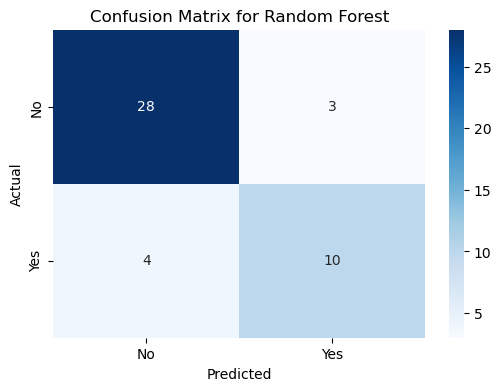

In [57]:
rf_cm = confusion_matrix(y_test, rf_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [58]:
rf_acc_score = accuracy_score(y_test, rf_predict)
rf_f1_score = f1_score(y_test, rf_predict, average='weighted')

print("Accuracy of Random Forest:", rf_acc_score * 100, '\n')
print("F1-Score of Random Forest Classifier:", rf_f1_score * 100, '\n')

print(classification_report(y_test, rf_predict))

Accuracy of Random Forest: 84.44444444444444 

F1-Score of Random Forest Classifier: 84.2798353909465 

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.77      0.71      0.74        14

    accuracy                           0.84        45
   macro avg       0.82      0.81      0.81        45
weighted avg       0.84      0.84      0.84        45



## 11. XGBoost

In [59]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.3, 0.7],
    'gamma': [0.0, 0.1, 0.2]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

xgb_best_params = grid_search.best_params_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


In [60]:
xgb = XGBClassifier(**xgb_best_params)
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)

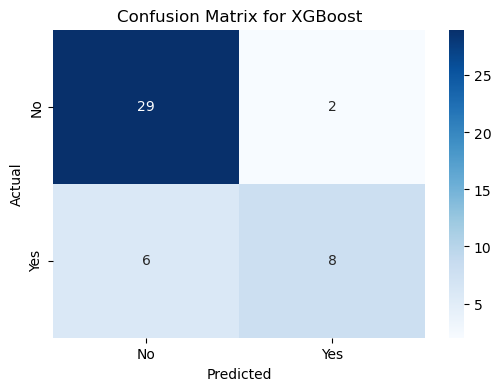

In [61]:
xgb_cm = confusion_matrix(y_test, xgb_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

In [62]:
xgb_acc_score = accuracy_score(y_test, xgb_predict)
xgb_f1_score = f1_score(y_test, xgb_predict, average='weighted')

print("Accuracy of XGBoost:", xgb_acc_score * 100, '\n')
print("F1-Score of XGBoost Classifier:", xgb_f1_score * 100, '\n')

print(classification_report(y_test, xgb_predict))

Accuracy of XGBoost: 82.22222222222221 

F1-Score of XGBoost Classifier: 81.27946127946129 

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        31
           1       0.80      0.57      0.67        14

    accuracy                           0.82        45
   macro avg       0.81      0.75      0.77        45
weighted avg       0.82      0.82      0.81        45



## 12. AdaBoost

In [63]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

ada = AdaBoostClassifier()

grid_search = GridSearchCV(estimator = ada, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

ada_best_params = grid_search.best_params_

print(ada_best_params)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'learning_rate': 1.0, 'n_estimators': 200}


In [64]:
ada = AdaBoostClassifier(**ada_best_params)
ada.fit(X_train, y_train)
ada_predict = ada.predict(X_test)

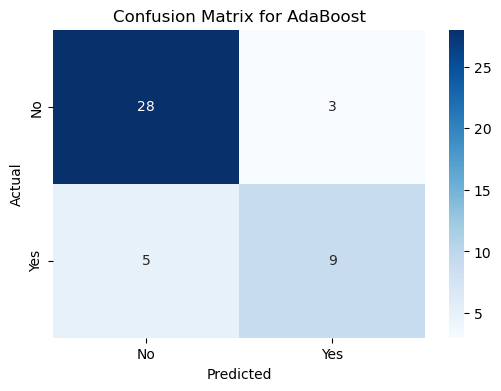

In [65]:
ada_cm = confusion_matrix(y_test, ada_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(ada_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost')
plt.show()

In [66]:
ada_acc_score = accuracy_score(y_test, ada_predict)
ada_f1_score = f1_score(y_test, ada_predict, average='weighted')

print("Accuracy of AdaBoost:", ada_acc_score * 100, '\n')
print("F1-Score of AdaBoost Classifier:", ada_f1_score * 100, '\n')

print(classification_report(y_test, ada_predict))

Accuracy of AdaBoost: 82.22222222222221 

F1-Score of AdaBoost Classifier: 81.81623931623932 

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        31
           1       0.75      0.64      0.69        14

    accuracy                           0.82        45
   macro avg       0.80      0.77      0.78        45
weighted avg       0.82      0.82      0.82        45



## 13. Gradient Boosting

In [67]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gbc = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator = gbc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grad_best_params = grid_search.best_params_

print(grad_best_params)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [68]:
gbc = GradientBoostingClassifier(**grad_best_params)
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)

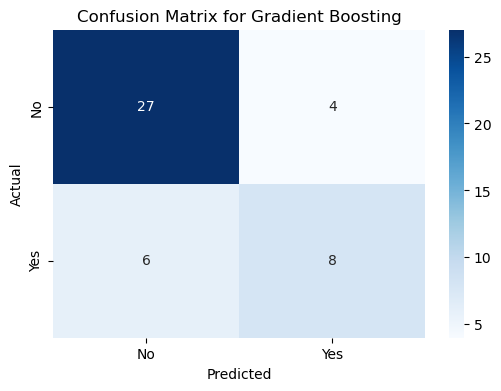

In [69]:
gbc_cm = confusion_matrix(y_test, gbc_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(gbc_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

In [70]:
gbc_acc_score = accuracy_score(y_test, gbc_predict)
gbc_f1_score = f1_score(y_test, gbc_predict, average='weighted')

print("Accuracy of Gradient Boosting:", gbc_acc_score * 100, '\n')
print("F1-Score of Gradient Boosting Classifier:", gbc_f1_score * 100, '\n')

print(classification_report(y_test, gbc_predict))

Accuracy of Gradient Boosting: 77.77777777777779 

F1-Score of Gradient Boosting Classifier: 77.27029914529913 

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.67      0.57      0.62        14

    accuracy                           0.78        45
   macro avg       0.74      0.72      0.73        45
weighted avg       0.77      0.78      0.77        45



## 14. Algorithm Analysis

Dari hasil *training* dan evaluasi berbagai model/algoritma *ensemble learning* yang ada, terlihat bahwa model/algortima **Random Forest** memiliki kinerja terbaik di antara model/algoritma yang lain. Model ini memiliki ***F1-score* terbaik untuk keseluruhan kelas (sekitar 84,28%)** dan **akurasi yang tertinggi (sekitar 84,4%)**.

Oleh karena itu, kami memilih model/algoritma **Random Forest** sebagai model yang paling baik dan sesuai untuk mengklasifikasikan atau memprediksi apakah pasien sudah meninggal saat waktu *follow-up*.


Note:
1. Jika kode program ini "dijalankan" ulang, akan terlihat bahwa **akurasi dari keempat model ini akan berubah-ubah**.
2. Hal ini kemungkinan besar disebabkan karena **model yang dibangun belum konvergen** akibat dari **jumlah data yang sedikit**, sehingga hasil pelatihan dari keempat model tidak dapat menghasilkan kinerja (akurasi) yang konsisten)
3. Oleh karena itu, untuk memperoleh kinerja dari model yang konsisten tiap menjalankan ulang program, diperlukan data yang lebih banyak dan besar.
4. Selain itu, untuk meningkatkan akurasi dan skor F1 dari model yang ada, diperlukan juga data yang lebih banyak dan cukup *balanced*.